### Haskell
- http://www.learnyouahaskell.com/
    - a good book for learning Haskell
- Functional Language
    - supports and encourages function oriented design
    - many languages support FOD, but Haskell is pure functional language
- testbed for new programming ideas
    - lots of features of other languages came from Haskell
        - e.g. Python list comprehension

### Features
- concise programs
    - see the sum example above
    - syntax is designed with concise programs in mind
        - few keywords
        - indentation based
        - often 2-10 times fewer lines than other languages
- powerful type system
    - strong ability to infer types and detect errors before execution
    - can create new types
- list comprehension
    - inherited a lot of ideas from LISP
- higher order functions
    - can pass a function to a function as a parameter
- lazy evaluation
    - don't compute anything until the result is required
    - allows you to work on infinite structures
        - e.g. list of all prime numbers where other languages would overflow or tell you no
- equational reasoning
    - you can use induction to reason about functions
### Side Effects
- can't read from keyboard or write to screen
- well you can, now that someone made monads
    - more on this later


### Syntax
- space is for function application, * is for multiplication
    - $f(a,b) + c \cdot d$ becomes `f a b + c * d`
- to sum ints from 1 to 10
    - `sum [1..10]`
        - [1..10] is a list
- ``` haskell
  double x = x + x
  quadruple x = double (double x)
  ```
  > `quadruple 10` returns 40

### In Class 3-29
``` haskell
take (double 2) [1,2,3,4,5,6]
take (quadruple 2) [1,2,3,4,5,6]
take (1+2) [1,2,3,4,5,6]
```

> `take (double 2) [1,2,3,4,5,6]` returns `[1,2]`
> `take (quadruple 2) [1,2,3,4,5,6]` returns `[1,2,3,4,5,6]`
> `take (1+2) [1,2,3,4,5,6]` returns `[1,2,3]`

- `take` takes the first n elements of a list
- `double` is a function that takes an int and returns an int
- `quadruple` is a function that takes an int and returns an int
- the code outputs


In [1]:
double x = x + x

take (double 2) [1,2,3,4,5,6]

[1,2,3,4]

In [2]:
sum [1..100]

5050

### The Standard Prelude
- booleans as with CPP
- `div` is modulo division
    - must be surrounded by backticks (\`) not single quotes (')
### GHCi
- using `$ ghc test.hs` will run the test.hs script
    - haskell doesn't actually care about extension, but adding hs lets you know what the file type is

``` haskell
average xs = sum xs / length xs
```
- will error out because of '/'
    - fromintegral converts int to float

``` haskell
average xs = fromIntegral (sum xs) / fromIntegral (length xs) 
```

### Naming
- Function and argument names must begin with a lower-case letter
and may be followed by one or more letters (both lower- and uppercase), digits, underscores, or single quotes (')
- put an s at the end of list variable names
    - a convention, but not required
    - lets you know that the variable is a list
- definitions mush be in the same column (as in python)
- indentation based, not semicolon or curly brace based
- `where` binds local variables
    - similar to `let` and `var` in JavaScript
- comments
    - ordinary
        - begin with `--`
    nested
        - bracketed by `{-` and `-}`

### In Class 3-31
Find the 3 errors in the following code:

In [ ]:
N = a 'div' length xs
    where
        a = 10
    xs = [1,2,3,4,5]

In [ ]:
n = a `div` length xs -- integer n = a integer divided by the (length of xs) 
    where -- establishes local variables used in the function
        a = 10 -- variable a = 10
        xs = [1,2,3,4,5] --variable xs is a list of integers from 1 to 5
print n

-- comment
{-also a comment-}

Errors:

1)
    1: N should be lower case
    2: div should be surrounded by backticks (\`) not single quotation marks (')
    3: xs should have two tabs tab in front, not a space, i.e. it should be in the same column as a
    
2) 
```haskell
n = a `div` length xs
    where
        a = 10
        xs = [1,2,3,4,5]
```
3) sets the value of n to the rounded a/(length of xs) integer value. In this case 10/5 = 2

4) 
```haskell
n = a `div` length xs -- integer n = a integer divided by the (length of xs) 
    where -- establishes local variables used in the function
        a = 10 -- variable a = 10
        xs = [1,2,3,4,5] --variable xs is a list of integers from 1 to 5
```

### Types
- haskell is a strongly typed language
- types use capital letters
    - e.g. `Bool` which contains `True` and `False`
- unlike JavaScript, type errors happen
    - e.g. `True + 1` will error out
- `e :: t` signifies that `e` has type `t`
- Types of Types
    - Bool
    - Int
    - Float
    - ...
- functions also have types
    - `not :: Bool -> Bool`
    - `even :: Int -> Bool`
    - convention is to preced the definition by the type
    
    
~~~haskell
add :: (Int, Int) -> Int -- explains the types in the function
add (x,y) = x+y -- defines the function

zeroto :: Int -> [Int]
zeroto n = [0..n]
~~~

In [ ]:
-- ['a', 'b', 'c'] :: [char]
[True,False,True,True] :: [Bool]


- tuples
    - type of a tuple is encoded in its size
    - type of components is unrestricted
- tuple of functions

### Currying
- **spicy**
- `f:: a -> (b -> c)` is equivalent to `f :: a -> b -> c`
    - "f takes `a` and `b` and returns `c`
- all Haskell functions are actually considered curried
    - mostly hidden in notation
    
~~~ haskell
add' :: Int -> (Int -> Int)
add' x y = x+y
~~~
- add' takes Int x and returns a function add' x
- this function takes Int y and returns result x+y
- the `'` character has no special significance and is a valid naming character
- add and add' produce the same final result
    - add takes its two arguments at the same time
    - add' takes them one at a time
    
### Why curry?
- formal proofs are easier with uniform functions
- you can generally ignore it

### Polymorphism & Overloading
- Parametric polymorphic
    - contains one or more type variables
        - e.g. `length :: [a] -> Int`
            - for any type a, length takes a list of values of type a and returns an Int
            - `length [False, True]`
            - `> length [False,True]
            2`                
    - function ignores the type
    - behaves identically regardless of the type
- Adhoc (overloaded) polymorphic
    - function behaves differently for different types
    - e.g. `sort :: Ord a => [a] -> [a]`
### Class constraints
- when the type is restricted to one type
- `C a =>`
    - `C` is the name of the class
    - `a` is the type of variable
    e.g. `(+) :: Num a => a -> a -> a`
        - For any numeric type a, (+) takes two values of type a and returns a value of type a
- Type Classes
    - Num - numerical
    - Eq - equality
    - Ord - ordered
    
```haskell
(+) :: Num a => a -> a -> a
(==) :: Eq a => a -> a -> Bool
(<) :: Ord a => a -> a -> Bool
```

### In Class 4-3
1.  what are the types of the values?

```
(True,['a','b']) :: (Bool,[Char])

['a','b','c'] :: [Char]
    - the list has type Char

('a','b','c') :: (Char, Char, Char)
```
    - the tuple is full of Chars (in this case)

```
[(False,'O'),(True,'1')] :: [(Bool, Char)]

([False,True],['0','1']) :: ([Bool],[Int])

[tail, init, reverse] :: [[a] -> [a]]
```

2.  What are the types of the functions?

```
second :: [a] -> a
second xs = head (tail xs)
```

```
swap :: (a, b) -> (b, a)
swap (x, y) = (y, x)
```

```
pair :: a -> b -> (a, b)
pair x y = (x, y)
```

```
double :: Num a => a -> a
double x = x * 2
```

```
palindrome :: [a] -> [a] -> Eq [a] => [a] -> [a] -> Bool
palindrome xs = reverse xs == xs
```

```
twice :: (a -> a) -> a -> a
twice f x = f (f x)
```

### Writing functions
```haskell
isDigit :: Char -> Bool
isDigit c = c >= '0' && c <= '9'
```
- conditional expressions
    ```haskell
    abs :: Int -> Int
    abs n = if n ≥ 0 then n else -n
    ```
    - abs takes an integer n and returns n if it is non-negative and -n otherwise
- guarded equations
    - like switch case in C++
    ```haskell
    abs :: Int -> Int
    abs n | n ≥ 0 = n
    | otherwise = -n
    
    signum n | n < 0 = -1
    | n == 0 = 0
    | otherwise = 1
    ```
    
        - otherwise is a catch all
            defined by otherwise = True
    - shouldn't use nested conditionals, use this instead
- pattern matching
    ```haskell
    signum n | n < 0 = -1
    | n == 0 = 0
    | otherwise = 1
    ```
    - put every possibility, it returns the case that it sees
    ``` haskell
        (&&) :: Bool -> Bool -> Bool
    True && True = True
    True && False = False
    False && True = False
    False && False = False
    
--     can be written as 
    True && True = True
    _ && _ = False
    ```
   
   - pattern matching numbers
    ``` haskell
    fib :: Int -> Int
    fib 0 = 1
    fib 1 = 1
    fib n = fib (n-1) + fib (n-2)
    ```
    
- list patterns
    - can use `(:)` "cons" operator that ads element to the start of a list
        - `1:(2:(3:(4:[])))` creates the list `[1,2,3,4]`
    ```haskell
    head :: [a] -> a
    head (x:_) = x
    tail :: [a] -> [a]
    tail (_:xs) = xs
    ```
    - head and tail map any non-empty list to first and remaining elements

- Lambda Functions
    - similar to JavaScript arrow functions
    - use the backslash key `\` (because it's kindof like a lambda)
    - `\x -> x + x`
        - nameless function that takes x and returns x + x 
    - good when you are currying
    ``` haskell
    odds n = map f [0..n-1]
        where
            f x = x*2 + 1
    ```
    - becomes
    ``` haskell
    odds n = map (\x -> x*2 + 1) [0..n-1]
    ```
    
- operator sections
    - allow an operator to be included in parentheses
        - `(1+)` successor
        - `(1/)` reciprocating
        - `(*2)` double
        - `(/2)` halfving

### IC 4-5
Consider a function safetail that behaves in the same way as tail, except that safetail maps the empty list to the empty list, whereas tail gives an error in this case.

Define safetail using:
1. A conditional expression
2. Guarded equations
3. Pattern matching

Hint: the library function null :: [a] -> Bool can be used to test if a list is empty.

In [3]:
-- tail accepts a list and returns the list without the first element
-- safetail accepts a list and returns the list without the first element if the list is not empty and returns an empty list if the list is empty

-- 1. conditional expression
safetail :: [a] -> [a]
safetail xs = if null xs then [] else tail xs

-- 2. guarded equations
safetail :: [a] -> [a]
safetail xs | null xs = []
            | otherwise = tail xs

-- 3. pattern matching
safetail :: [a] -> [a]
safetail [] = []
safetail (_:xs) = xs

In [5]:
safetail :: [a] -> [a]
safetail xs = if null xs then [] else tail xs

-- example usage
safetail [1,2,3]
safetail []

[2,3]

[]

In [6]:
safeTail :: [a] -> [a]
safeTail xs | null xs = []
            | otherwise = tail xs

-- example usage
safeTail [1,2,3]
safeTail []

[2,3]

[]

In [7]:
safeTail :: [a] -> [a]
safeTail [] = []
safeTail (_:xs) = xs

-- example usage
safeTail [1,2,3]
safeTail []

[2,3]

[]

### Haskell List Comprehension
- `[x^2 | x <- [1..5]]` creates a list `[1,4,9,16,25]`, the squares of list `[1...5]`
- Multiple Generators
    - order matters
        - `> [(x,y) | x <- [1,2,3], y <- [4,5]]`
        - outputs `[(1,4),(1,5),(2,4),(2,5),(3,4),(3,5)]` 
        - `> [(x,y) | y <- [4,5], x <- [1,2,3]]`
        - outputs `[(1,4),(2,4),(3,4),(1,5),(2,5),(3,5)] `
- Dependent Generators
    - variables depend on each other
        - `[(x,y) | x <- [1..3], y <- [x..3]]`
        ```haskell 
        concat :: [[a]] -> [a]
    concat xss = [x | xs <- xss, x <- xs]
    ```
    -e.g. 
    ```haskell
    > concat [[1,2,3],[4,5],[6]]
    ```
        - outputs `[1,2,3,4,5,6]`
        
- Guards
    - restrict values used by earlier generators
    ```haskell
    factors :: Int -> [Int]
    factors n =
    [x | x <- [1..n], n `mod` x == 0]
    ```
    - e.g.

    ```haskell
    > factors 15
    ```
        - outputs `[1,3,5,15]`
- Zip Function
    - library function which maps two lists to a list of pairs of corresponding elements
        ```haskell
        zip :: [a] -> [b] -> [(a,b)]
        ```
    - e.g.
    ```haskell
    > zip ['a','b','c'] [1,2,3,4]
    ```
        - outputs `[('a',1),('b',2),('c',3)]`

    ```haskell
    sorted :: Ord a => [a] -> Bool
    sorted xs = and [x ≤ y | (x,y) <- pairs xs]
    ```
    ```haskell
    > sorted [1,2,3,4]
    True
    > sorted [1,3,2,4]
    False
    ```



- String Manipulation via Lists
    - strings are just lists of chars
    - `"abc" :: String` is the same as `'a':'b':'c':[]` which is the same as `['a','b','c'] :: [Char]`

In [2]:
length "abcde"

take 3 "abcde"
zip "abc" [1,2,3,4]

5

"abc"

[('a',1),('b',2),('c',3)]

In [ ]:
-- using a list comprehension give an expression that calculate the sum of the squares of the first 100 integers
sum [x^2 | x <- [1..100]]

-- a triple (x,y,z) of positive integers is such that x^2 + y^2 = z^2 use a list comprehension to define
-- pyths:: Int -> [(Int,Int,Int)]

pyths :: Int -> [(Int,Int,Int)]
pyths n = [(x,y,z) | x <- [1..n], y <- [1..n], z <- [1..n], x^2 + y^2 == z^2]

pyths 5
pyths 13


338350

[(3,4,5),(4,3,5)]

[(3,4,5),(4,3,5),(5,12,13),(6,8,10),(8,6,10),(12,5,13)]

### Recursive functions


In [4]:
fac 0 = 1
fac n= n * fac (n-1)

fac 3

product :: Num a => [a] -> a
product [] = 1
product (n:ns) = n * product ns

product [1,2,3,4,5]

reverse :: [a] -> [a]
reverse [] = []
reverse (x:xs) = reverse xs ++ [x]

reverse [1,2,3,4,5]

Line 7: Use foldr
Found:
product [] = 1
product (n : ns) = n * product ns
Why not:
product ns = foldr (*) 1 ns

6

120

[5,4,3,2,1]

'''haskell
product :: Num a => [a] -> a
product [] = 1
product (n:ns) = n * product ns
'''
- maps the empty list to 1 and any non-empty list to the product of its elements
  - i.e. the product of all the numbers in the list
### Multiple Arguments
- functions can have multiple arguments
    - e.g. `zip` takes two lists and returns a list of corresponding pairs
    - e.g. `drop` takes a number and a list and drops the number of elements from the front of the list
    - e.g. `elem` takes an element and a list and returns True if the element is in the list and False otherwise
-


In [ ]:
zip :: [a] -> [b] -> [(a,b)]
zip [] _ = []
zip _ [] = []
zip (x:xs) (y:ys) = (x,y) : zip xs ys

zip [1,2,3] [4,5,6]

[(1,4),(2,5),(3,6)]

- zip:
    - works by taking the first element of each list and pairing them together
    - then it takes the second element of each list and pairs them together
    - and so on

### Quicksort
- the empty list is already sorted
- any non-empty list can be sorted by
    - sorting the elements smaller than the head of the list
        - `smaller = [a | a <- xs, a <= x]`
    -  sorting the elements larger than the head of the list
        - `larger = [a | a <- xs, a > x]`
    - then concatenating the sorted smaller elements, the head of the list and the sorted larger elements
        - `quicksort smaller ++ [x] ++ quicksort larger`
``` haskell
qsort :: Ord a => [a] -> [a]
qsort [] = []
qsort (x:xs) =
qsort smaller ++ [x] ++ qsort larger
where
smaller = [a | a <- xs, a ≤ x]
larger = [b | b <- xs, b > x]
```

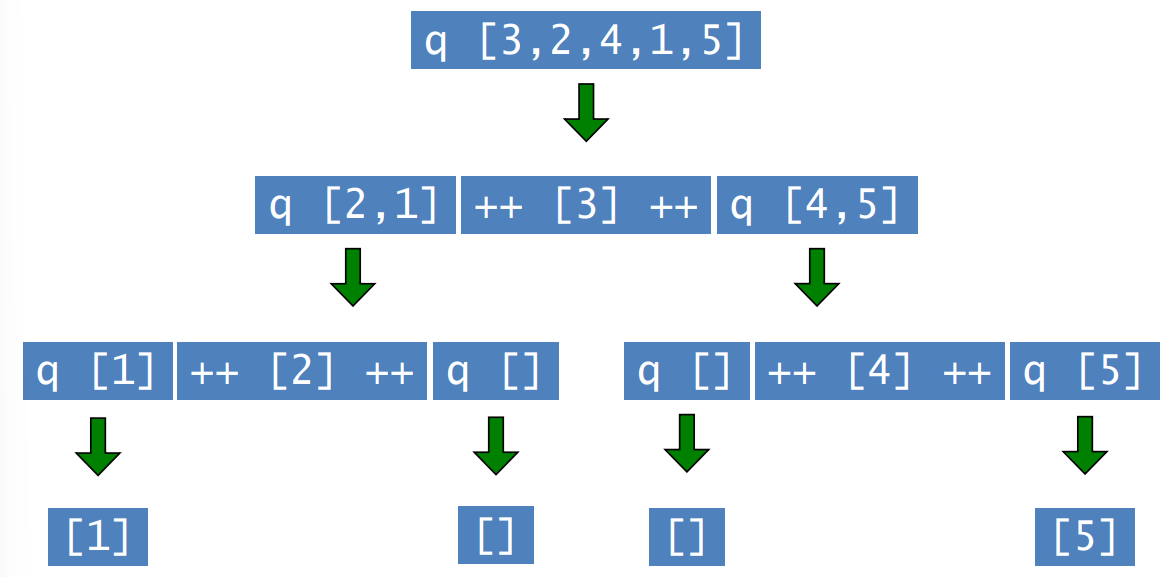

### writing recursive functions
- Step 1: Define the type
    - e.g. `product :: [Int] -> Int`
- Step 2: Enumerate the cases
    - e.g. `product :: [Int] -> Int`
    - e.g. `product []`
    - e.g. `product (n:ns)`
- Step 3: Define the simple cases
    - e.g. `product :: [Int] -> Int`
    - e.g. `product [] = 1`
    - e.g. `product (n:ns) =`
- Step 4: Define the other cases
    - e.g. `product :: [Int] -> Int`
    - e.g. `product [] = 1`
    - e.g. `product (n:ns) = n * product ns`
- Step 5: Generalize and simplify
    - e.g. `product :: Num a => [a] -> a`
    - e.g. `product [] = 1`
    - e.g. `product (n:ns) = n * product ns`

- another example
    - Step 1: Define the type
        - e.g. `drop :: Int -> [a] -> [a]`
    - Step 2: Enumerate the cases
        - e.g. `drop :: Int -> [a] -> [a]`
        - e.g. `drop 0 [] =`
        - e.g. `drop 0 (x:xs) = `
        - e.g. `drop n [] =`
        - e.g. `drop n (x:xs) =`
    - Step 3: Define the simple cases
        - e.g. `drop :: Int -> [a] -> [a]`
        - e.g. `drop 0 [] = []`
        - e.g. `drop 0 (x:xs) = x:xs`
        - e.g. `drop n [] = []`
        - e.g. `drop n (x:xs) =`
    - Step 4: Define the other cases
        - e.g. `drop :: Int -> [a] -> [a]`
        - e.g. `drop 0 [] = []`
        - e.g. `drop 0 (x:xs) = x:xs`
        - e.g. `drop n [] = []`
        - e.g. `drop n (x:xs) = drop (n-1) xs`
    - Step 5: Generalize and simplify
        - e.g. `drop :: Int -> [a] -> [a]`
        - e.g. ~~~`drop 0 [] = []`~~~
        - e.g. ~~~`drop 0 (x:xs) = x:xs`~~~
            - these can be simplified out
        - e.g. `drop n [] = []`
        - e.g. `drop n (x:xs) = drop (n-1) xs`
    - Step 6: Define the function using guards
        - e.g. `drop :: Int -> [a] -> [a]`
        - e.g. `drop n xs | n <= 0 = xs`
        - e.g. `drop _ [] = []`
        - e.g. `drop n (_:xs) = drop (n-1) xs`
                - the n in line 3 and x in line 4 can be replaced with an underscore
                        - the underscore is a wildcard pattern that matches anything

### In Class 4-10
1 - listsum function
- Step 1: Define the type
`listsum :: [Int] -> Int`
- Step 2: Enumerate the cases
`listsum :: [Int] -> Int`
`listsum []`
`listsum (n:ns)`
- Step 3: Define the simple cases
`listsum :: [Int] -> Int`
`listsum (n:ns) =`
- Step 4: Define the other cases
`listsum :: [Int] -> Int`
`listsum (n:ns) = n + listsum ns`
- Step 5: Generalize and simplify
`listsum :: Num a => [a] -> a`
`listsum (n:ns) | null ns = n`
`listsum (n:ns) = n + listsum ns`

2 - `sumdown :: Int -> Int`
- Step 1: Define the type
`sumdown :: [Int] -> Int`
- Step 2: Enumerate the cases
`sumdown :: [Int] -> Int`
`sumdown 0`
- Step 3: Define the simple cases
`sumdown :: [Int] -> Int`
`sumdown 0 = 0`
`sumdown n =`
- Step 4: Define the other cases
`sumdown :: [Int] -> Int`
`sumdown 0 = 0`
`sumdown n = n + sumdown (n-1)`
- Step 5: Generalize and simplify
`sumdown :: Int -> Int`
`sumdown 0 = 0`
`sumdown n = n + sumdown (n-1)`


In [5]:
listsum :: Num a => [a] -> a
listsum (n:ns) | null ns = n
listsum (n:ns) = n + listsum ns

listsum [1,2,3,4,5]

sumdown :: Int -> Int
sumdown 0 = 0
sumdown n = n + sumdown (n-1)

sumdown 3

15

6

### Higher Order Functions
- functions that take functions as arguments or return functions as results
- e.g.
    - `map :: (a -> b) -> [a] -> [b]`
    - `map f [] = []`
    - `map f (x:xs) = f x : map f xs`
        - this is a recursive function that applies the function f to each element of the list and returns a new list
- useful for
    - encoding idioms
        - idioms are common patterns of code represented by natural language
    - abstracting common patterns
        - e.g. `map` and `filter`
    - algebraic functions
        - e.g. `foldr`
- filter function

```haskell
-- recursive function definition
filter p [] = []
filter p (x:xs)
    | p x = x : filter p xs
    | otherwise = filter p xs
```

```haskell
-- list comprehension function definition
filter p xs = [x | x <- xs, p x]
```
    - this is a recursive function that applies the function p to each element of the list and returns a new list with only the elements that satisfy the predicate p

- Foldr function
    - `f [] = v`
    - `f (x:xs) = x # f xs`
        - this is a recursive function that applies the function f to each element of the list and returns a new list
        - fill in the blanks
            - `#` is the function
            - `v` is the value
            - `x` is the element
            - `xs` is the list
    - e.g.
        ```haskell
      sum [] = 0
sum (x:xs) = x + sum xs
```
    - same as `sum = foldr (+) 0`
    - e.g.
        ```haskell
      product [] = 1
product (x:xs) = x * product xs
```
    - same as `product = foldr (*) 1`
    - e.g.
        ```haskell
      and [] = True
and (x:xs) = x && and xs
```
    - same as `and = foldr (&&) True`
- how it works
    - foldr simultaneously replaces each `:` in a list with the function `#` and replaces the `[]` with the value `v`
    - e.g.
        - `sum [1,2,3,4,5]`
            - =
        - `foldr (+) 0 [1,2,3,4,5]`
            - =
        - `foldr (+) 0 (1:(2:(3:(4:(5:[])))))`
            - =
        - `1+(2+(3+(4+(5+0))))`
            - =
        - `15`

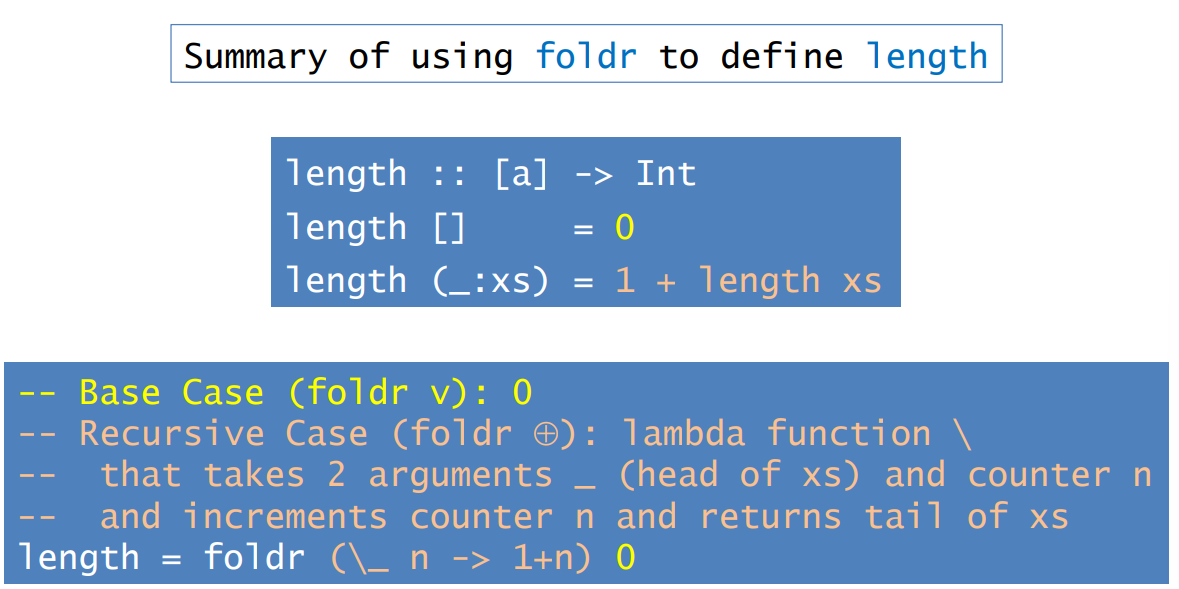

### Other Library Functions
- `.` returns the composition of two functions
    -definition
    ```haskell
    (.) :: (b -> c) -> (a -> b) -> (a -> c)
    f . g = \x -> f (g x)
    ```
    - not as ugly in practice as the definition makes it seem
    - e.g.
    ```haskell
    odd :: Int -> Bool
    odd = not . even
    ```
    - e.g.
    ```haskell
    sumsqreven = sum . map (^2) . filter even
    ```
        - this function takes a list of integers and returns the sum of the squares of the even numbers in the list
- `all` returns true if all elements of a list satisfy a predicate
    - definition
    ```haskell
    all :: (a -> Bool) -> [a] -> Bool
    all p = and . map p
    ```
    - e.g.
    ```haskell
    all even [2,4,6,8]
    ```
- `any` returns true if any element of a list satisfies a predicate
- `takeWhile` selects elements from a list while a predicate holds for all elements
    - i.e. it returns until it hits the first element that doesn't satisfy the predicate
    - definition
    ```haskell
    takeWhile :: (a -> Bool) -> [a] -> [a]
    takeWhile p [] = []
    takeWhile p (x:xs)
        | p x = x : takeWhile p xs
        | otherwise = []
    ```
    - e.g.
    ```haskell
    takeWhile even [2,4,6,7,8,10]
    ```
- `dropWhile` removes elements from a list while a predicate holds for all elements
    - i.e. it returns the list after the first element that doesn't satisfy the predicate

In [8]:
odd :: Int -> Bool
odd = not . even

odd 3
odd 10456

sumsqreven = sum . map (^2) . filter even

sumsqreven [1,2,3,4,5,6,7,8,9,10]

takewhile :: (a -> Bool) -> [a] -> [a]
takewhile p [] = []
takewhile p (x:xs)
    | p x = x : takewhile p xs
    | otherwise = []

takewhile even [2,4,6,7,8,10]

dropwhile :: (a -> Bool) -> [a] -> [a]
dropwhile p [] = []
dropwhile p (x:xs)
    | p x = dropwhile p xs
    | otherwise = x:xs

dropwhile even [2,4,6,7,8,10]

True

False

220

[2,4,6]

[7,8,10]

### In Class 4-12

1. `[fx | x <- xs, p x]`
using map and filter functions

```haskell
map f (filter p xs)
```

2. define map f using foldr

```haskell
map f = foldr (\x xs -> f x : xs) []
```
3. define filter p using foldr

```haskell
filter p = foldr (\x xs -> if p x then x:xs else xs) []
```


In [ ]:
map f (filter p xs)

map (^2) (filter even [1,2,3,4,5,6,7,8,9,10])

: 

In [ ]:
map f = foldr (\x xs -> f x : xs) []

map (^2) (filter even [1,2,3,4,5,6,7,8,9,10])

[4,16,36,64,100]

In [ ]:
filter p = foldr (\x xs -> if p x then x:xs else xs) []

filter even [1,2,3,4,5,6,7,8,9,10]

[2,4,6,8,10]

### Type Declarations
- use the `type` declaration to give a name to a type
```haskell
type Position = (Int, Int) -- defines an x and y position

origin :: Position
origin = (0,0)
left :: Position -> Position
left (x,y) = (x-1,y)
```

- can be nested but not recursive
```haskell
type Pos = (Int,Int)
type Trans = Pos -> Pos
```

### Data Declarations
- use the `data` declaration to define a new type
```haskell
data Answer = Yes | No | Unknown
```
- the values of this type are `Yes`, `No`, and `Unknown`
    - these are called the constructors of the type
    - they must begin with a capital letter
```haskell
answers :: [Answer]
answers = [Yes,No,Unknown]

flip :: Answer -> Answer
flip Yes = No
flip No = Yes
flip Unknown = Unknown
```
- constructors can take arguments
```haskell
data Shape = Circle Float -- circle takes one argument of type float, the radius
            | Rect Float Float -- rect takes two arguments of type float, the width and height
```
- Shape is a type with two constructors
    - Circle takes one argument of type Float
    - Rect takes two arguments of type Float
```haskell
area :: Shape -> Float -- takes a shape and returns a float
area (Circle r) = pi * r^2
area (Rect x y) = x * y
```

### Data Declaration Parameters
- can use type parameters in data declarations
```haskell
data Maybe a = Nothing | Just a
```
- Maybe is a built-in type
    - Maybe a is a type with two constructors
        - Nothing takes no arguments
        - Just takes one argument of type a
```haskell
safeDiv :: Int -> Int -> Maybe Int
safeDiv _ 0 = Nothing
safeDiv m n = Just (m `div` n)
```


In [ ]:
data Maybe a = Nothing | Just a

safediv :: Int -> Int -> Maybe Int
safediv _ 0 = Nothing
safediv m n = Just (m `div` n)


safeDiv 10 2
safeDiv 10 0
-- debug later

: 

### Recursive Data Declarations
- new types can be declared in terms of themselves
```haskell
data List a = Empty | Cons a (List a)
```
- List is a type with two constructors
    - Empty takes no arguments
    - Cons takes one argument of type a and one argument of type List a
```haskell
len :: List a -> Int
len Empty = 0
len (Cons _ xs) = 1 + len xs
```
- can also be used to define trees
```haskell
data Tree a = Leaf a | Node (Tree a) (Tree a)
```
- Tree is a type with two constructors
    - Leaf takes one argument of type a
    - Node takes two arguments of type Tree a
```haskell
size :: Tree a -> Int
size (Leaf a) = 1
size (Node lhs _ rhs) = size lhs + 1 + size rhs
flatten :: Tree a -> [a]
flatten (Leaf a) = [a]
flatten (Node lhs a rhs) = flatten lhs ++ [a] ++ flatten rhs
```


In [6]:
data Tree a = Leaf a | Node (Tree a) a (Tree a)

size :: Tree a -> Int
size (Leaf a) = 1
size (Node lhs _ rhs) = size lhs + 1 + size rhs
flatten :: Tree a -> [a]
flatten (Leaf a) = [a]
flatten (Node lhs a rhs) = flatten lhs ++ [a] ++ flatten rhs

t :: Tree Int
t = Node (Node (Leaf 1) 3 (Leaf 4)) 5 (Node (Leaf 6) 7 (Leaf 9))

flatten t

[1,3,4,5,6,7,9]

### In Class 4-14
Consider the following type of binary trees:
data Tree a = Leaf a | Node (Tree a) (Tree a)
• Let us say that such a tree is balanced if the number of leaves in the
left and right subtree of every node differs by at most one.

1. Define a function that returns the number leaves
in a tree:
leaves :: Tree a -> Int

2. Use the leaves function, to define a function:
balanced :: Tree a -> Bool
That decides if a binary tree is balanced or not.

In [1]:
data Tree a = Leaf a | Node (Tree a) a (Tree a)

leaves :: Tree a -> Int
leaves (Leaf a) = 1 -- base case, leaf has one leaf
leaves (Node lhs _ rhs) = leaves lhs + leaves rhs -- recursive case, add the leaves of the left and right subtrees

balanced :: Tree a -> Bool -- base case, balanced if the number of leaves in the left and right subtree of every node differs by at most one
balanced (Leaf a) = True -- base case, balanced if the number of leaves in the left and right subtree of every node differs by at most one
balanced (Node lhs _ rhs) = abs (leaves lhs - leaves rhs) <= 1 && balanced lhs && balanced rhs -- recursive case, balanced if the number of leaves in the left and right subtree of every node differs by at most one

In [2]:
t :: Tree Int -- 
t = Node (Node (Leaf 1) 3 (Leaf 4)) 5 (Node (Leaf 6) 7 (Leaf 9))

leaves t
balanced t

4

True

### Countdown Problem
- quiz program on British television based on a French version "Des Chiffres et Des Lettres"
- Assignment 7 will be an inefficient solution to the countdown problem and two stages of optimization
- e.g. given the numbers `1, 3, 7, 10, 25, 50` and `+` `-` `*` `/` `(` `)` and the target number `765`, find an expression that evaluates to `765`
    - all numbers are positive integers
    - the expression must use each number exactly once
    - there are 780 possible solutions to this example
  - e.g. target `831` using the above numbers
    - there are no solutions to this example with the numbers provided

1. Define a type to represent the operators
    ```haskell
    data Op = Add | Sub | Mul | Div | Pow
    instance Show Op where
        show Add = "+"
        show Sub = "-"
        show Mul = "*"
        show Div = "/"
        show Pow = "^"
    ```
    - `Op` is a type with five constructors
        - `Add`, `Sub`, `Mul`, `Div`, and `Pow`
        - `Add`, `Sub`, `Mul`, and `Div` take no arguments
        - `Pow` takes one argument of type `Int`
    ```haskell
    apply :: Op -> Int -> Int -> Int
    apply Add x y = x + y
    apply Sub x y = x - y
    apply Mul x y = x * y
    apply Div x y = x `div` y
    ```
    - `apply` takes an operator and two numbers and applies the operator to the numbers
    ```haskell
    valid :: Op -> Int -> Int -> Bool
    valid Add _ _ = True
    valid Sub x y = x > y
    valid Mul _ _ = True
    valid Div x y = y /= 0 && x `mod` y == 0
    ```
    - `valid` takes an operator and two numbers and returns `True` if the operator can be applied to the numbers
        - `Sub 2 3` is not valid because 2 is not greater than 3
        - `Div 2 3` is not valid because 3 does not divide 2 evenly
    ```haskell
    data Expr = Val Int | App Op Expr Expr
    instance Show Expr where
        show (Val n) = show n
        show (App o l r) = brak l ++ show o ++ brak r
            where
                brak (Val n) = show n
                brak e = "(" ++ show e ++ ")"

    eval :: Expr -> [Int]
    eval (Val n) = [n | n > 0]
    eval (App o l r) = [apply o x y | x <- eval l
    , y <- eval r
    , valid o x y]
    ```
    - `Expr` is a type with two constructors
        - `Val` takes one argument of type `Int`
        - `App` takes one argument of type `Op` and two arguments of type `Expr`
    - eval evaluates the expression and returns the result of the operations
    - e.g.
    ```
    Main> eval (App Add (Val 2)(Val 3))
    [5]
    Main> eval (App Sub (Val 2)(Val 3))
    []
    ```
    ```haskell
    subs :: [a] -> [[a]]
    subs [] = [[]]
    subs (x:xs) = yss ++ map (x:) yss
                        where yss = subs xs
    interleave :: a -> [a] -> [[a]]
    interleave x [] = [[x]]
    interleave x (y:ys) = (x:y:ys) : map (y:) (interleave x ys)
    perms :: [a] -> [[a]]
    perms [] = [[]]
    perms (x:xs) = concat (map (interleave x) (perms xs))
    choices :: [a] -> [[a]]
    choices = concat . map perms . subs
    ```
    - `subs` takes a list and returns a list of all possible subsequences
    - `interleave` takes an element and a list and returns a list of all possible lists with the element inserted between each element of the list
    - `perms` takes a list and returns a list of all possible permutations of the list
    - `choices` takes a list and returns a list of all possible choices of the list
        - a choice is a permutation of a subsequence
    - e.g.
    ```
    Main> choices [1,2] -- all possible choices of [1,2]
    [[],[1],[2],[1,2],[2,1]]

    Main> perms [1,2] -- all possible permutations of [1,2]
    [[1,2],[2,1]]

    Main> map perms (subs [1,2])  -- all possible permutations of all possible subsequences of [1,2]
    [[[]],[[2]],[[1]],[[1,2],[2,1]]]

    Main> concat (map perms (subs [1,2]))  -- all possible permutations of all possible subsequences of [1,2] concatenated in order
    [[],[2],[1],[1,2],[2,1]]
    ```
    ```haskell
    solution :: Expr -> [Int] -> Int -> Bool
    solution e ns n = elem (values e) (choices ns)
                        && eval e == [n]
    ```
    - `solution` takes an expression, a list of numbers, and a target number and returns `True` if the expression can be evaluated to the target number using the numbers
    - e.g.
    ```
    Main> solution e [1,3,7,10,25,50] 765
    True
    ```
    ```haskell
    split :: [a] -> [([a],[a])]
    split [] = []
    split [_] = []
    split (x:xs) = ([x],xs) : [(x:ls,rs)
                                    | (ls,rs) <- split xs]
    ```
2.  Brute Force solution
    - `split` takes a list and returns a list of all possible splits of the list
        - a split is a pair of lists
        - the first list contains the first element of the original list
        - the second list contains the rest of the original list
            - the second list can be empty
    - e.g.
    ```
    Main> split [1,2,3,4]
    [((1,[]),(2,3,4)),((1,2),(3,4)),((1,2,3),(4,))]
    ```
    ```haskell
    combine :: Expr -> Expr -> [Expr]
    combine l r =
            [App o l r | o <- [Add,Sub,Mul,Div]]
    ```
    - `combine` takes two expressions and returns a list of all possible expressions that combine the two expressions
        - the expressions are combined using the four operators
    ```haskell
    exprs :: [Int] -> [Expr]
    exprs [] = []
    exprs [n] = [Val n]
    exprs ns = [e | (ls,rs) <- split ns
    , l <- exprs ls
    , r <- exprs rs
    , e <- combine l r]
    ```
    - `exprs` takes a list of numbers and returns a list of all possible expressions that can be formed using the numbers
        - the expressions are formed by combining the numbers using the four operators
    - e.g.
    ```haskell
    solutions :: [Int] -> Int -> [Expr]
    solutions ns n = [e | ns' <- choices ns
                                , e <- exprs ns'
                                , eval e == [n]]
    ```
    - `solutions` takes a list of numbers and a target number and returns a list of all possible expressions that can be formed using the numbers and evaluated to the target number
        - the expressions are formed by combining the numbers using the four operators
                - the numbers can be used in any order
    - e.g.
    ```
    main :: IO ()
    main = print (solutions [1,3,7,10,25,50] 765)
    ```
    - `main` prints all possible solutions to the problem
        - the solutions are printed in a list


compiling and performance testing
```bash
ghc countdown.hs
[1 of 1] Compiling Main
Linking countdown ...
```

compiling and performance testing
```bash
$ time ./countdown
[[1,3,7,10,25,50], ...]
```

### In Class 4-17
redefine choices to use a list comprehension rather than concat and map
```haskell
choices :: [a] -> [[a]]
choices xs = [zs | ys <- subs xs, zs <- perms ys]
```

In [1]:
choices :: [a] -> [[a]]
choices xs = [zs | ys <- subs xs, zs <- perms ys]

: 

In [2]:
data Op = Add | Sub | Mul | Div | Pow
instance Show Op where
    show Add = "+"
    show Sub = "-"
    show Mul = "*"
    show Div = "/"
    show Pow = "^"

apply :: Op -> Int -> Int -> Int
apply Add x y = x + y
apply Sub x y = x - y
apply Mul x y = x * y
apply Div x y = x `div` y

valid :: Op -> Int -> Int -> Bool
valid Add _ _ = True
valid Sub x y = x > y
valid Mul _ _ = True
valid Div x y = y /= 0 && x `mod` y == 0

data Expr = Val Int | App Op Expr Expr
instance Show Expr where
    show (Val n) = show n
    show (App o l r) = brak l ++ show o ++ brak r
                        where
                            brak (Val n) = show n
                            brak e = "(" ++ show e ++ ")"

subs :: [a] -> [[a]]
subs [] = [[]]
subs (x:xs) = yss ++ map (x:) yss
                  where yss = subs xs
interleave :: a -> [a] -> [[a]]
interleave x [] = [[x]]
interleave x (y:ys) = (x:y:ys) : map (y:) (interleave x ys)
perms :: [a] -> [[a]]
perms [] = [[]]
perms (x:xs) = concat (map (interleave x) (perms xs))

choices :: [a] -> [[a]]
choices xs = [zs | ys <- subs xs, zs <- perms ys] -- list comprehension
-- explain the function choices
-- choices takes a list and returns a list of all possible choices of the list -- a choice is a permutation of a subsequence

Line 38: Use concatMap
Found:
concat (map (interleave x) (perms xs))
Why not:
concatMap (interleave x) (perms xs)

No I don't know "Use concatMap" means

In [3]:
-- proof of functionality
choices [1,5,3]

[[],[3],[5],[5,3],[3,5],[1],[1,3],[3,1],[1,5],[5,1],[1,5,3],[5,1,3],[5,3,1],[1,3,5],[3,1,5],[3,5,1]]

### Haskell Sodoku
- in C++ this is > 200 lines of code
- in Haskell this is <50 lines of code
- rules:
    - each row must contain the numbers 1-9
    - each column must contain the numbers 1-9
    - each 3x3 box must contain the numbers 1-9
    - no box/row/column can contain the same number twice
- example:
  ![sudoku](https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Sudoku-by-L2G-20050714.svg/250px-Sudoku-by-L2G-20050714.svg.png)
- example solution:
- ![sudoku solution](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Sudoku-by-L2G-20050714_solution.svg/250px-Sudoku-by-L2G-20050714_solution.svg.png)

### types and functions
- types
```haskell
type Grid = Matrix Char -- a grid is a matrix of characters
type Matrix a = [Row a] -- a matrix is a list of rows
type Row a = [a] -- a row is a list of elements
```
- basic definitions
```haskell
boxsize :: Int -- the size of a box
boxsize = 3 -- a box is 3x3
values :: [Char] -- the possible values in a cell
values = ['1'..'9'] -- the values are 1-9
empty :: Char -> Bool -- is a cell empty?
empty = (== ' ') -- a cell is empty if it contains a space
single :: [a] -> Bool  -- is a list a single element?
single [_] = True  -- a list is a single element if it contains a single element
single _ = False  -- a list is not a single element if it contains more than one element
```
- functions
```haskell
import Data.List  -- import the Data.List module
rows :: Matrix a -> [Row a]  -- get the rows of a matrix
rows m = m  -- the rows of a matrix are the matrix itself

cols :: Matrix a -> [Row a] -- get the columns of a matrix
cols = transpose  -- the columns of a matrix are the transpose of the matrix

boxs :: Matrix a -> [Row a]  -- get the boxes of a matrix
boxs = unpack . map cols . pack  -- the boxes of a matrix are the columns of the boxes of the matrix
    where
        pack = split . map split  -- pack a matrix into boxes
        split = chop boxsize  -- split a list into sublists of length boxsize
        unpack = map concat . concat  -- unpack a matrix of boxes into a matrix
chop :: Int -> [a] -> [[a]]  -- chop a list into sublists of length n
chop n [] = []  -- chop an empty list into an empty list
chop n xs = take n xs : chop n (drop n xs)  -- chop a list into a list of sublists of length n
```
- checking if a grid is valid
```haskell
valid :: Grid -> Bool  -- is a grid valid?
valid g = all nodups (rows g) &&  -- a grid is valid if all rows, columns, and boxes are valid
            all nodups (cols g) &&  -- a grid is invalid if any rows, columns, or boxes are invalid
            all nodups (boxs g)  -- a grid is invalid if any rows, columns, or boxes are invalid
nodups :: Eq a => [a] -> Bool  -- are all elements of a list unique?
nodups [] = True  -- a list is unique if it is empty
nodups (x:xs) = not (elem x xs) && nodups xs  -- a list is unique if its head is not in its tail and its tail is unique
```
- making choices
    - replace each blank square with a list of possible values
```haskell
values :: [Char]   -- the possible values in a cell
values = ['1'..'9’]  -- the values are 1-9
choices :: Grid -> Matrix [Char]  -- make choices for a grid
choices = map (map choice)  -- make choices for each cell in a grid
    where  -- a cell is a choice if it is empty or a singleton
        choice v = if empty v then values else [v]  -- a cell is a choice if it is empty or a singleton
```
- collapsing the choices
    - uses the cartesian product function to find all possible ways to fill in the blanks
        - cp creates a list of all possible combinations of the elements of a list of lists
        - e.g. cp [[1,2],[3,4]] = [[1,3],[1,4],[2,3],[2,4]]
```haskell
cp :: [[a]] -> [[a]]  -- cartesian product of a list of lists
cp [] = [[]]    -- the cartesian product of an empty list is the empty list
cp (xs:xss) = [y:ys | y <- xs, ys <- cp xss]  -- the cartesian product of a list of lists is the list of all possible combinations of the elements of the list of lists

collapse :: Matrix [Char] -> [Grid]  -- collapse a matrix of choices into a list of grids
collapse = cp . map cp  -- collapse a matrix of choices into a list of grids
```

### In Class 4-19
- using this grid:
- 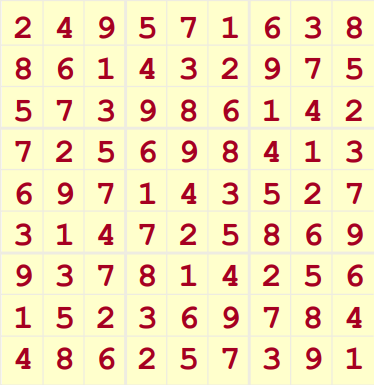
1. (5,3)
2. 

In [4]:
type Grid = Matrix Char -- a grid is a matrix of characters
type Matrix a = [Row a] -- a matrix is a list of rows
type Row a = [a] -- a row is a list of elements

boxsize :: Int -- the size of a box
boxsize = 3 -- a box is 3x3
values :: [Char] -- the possible values in a cell
values = ['1'..'9'] -- the values are 1-9
empty :: Char -> Bool -- is a cell empty?
empty = (== ' ') -- a cell is empty if it contains a space
single :: [a] -> Bool  -- is a list a single element?
single [_] = True  -- a list is a single element if it contains a single element
single _ = False  -- a list is not a single element if it contains more than one element

import Data.List  -- import the Data.List module
rows :: Matrix a -> [Row a]  -- get the rows of a matrix
rows m = m  -- the rows of a matrix are the matrix itself

cols :: Matrix a -> [Row a] -- get the columns of a matrix
cols = transpose  -- the columns of a matrix are the transpose of the matrix

boxs :: Matrix a -> [Row a]  -- get the boxes of a matrix
boxs = unpack . map cols . pack  -- the boxes of a matrix are the columns of the boxes of the matrix
    where
        pack = split . map split  -- pack a matrix into boxes
        split = chop boxsize  -- split a list into sublists of length boxsize
        unpack = map concat . concat  -- unpack a matrix of boxes into a matrix
chop :: Int -> [a] -> [[a]]  -- chop a list into sublists of length n
chop n [] = []  -- chop an empty list into an empty list
chop n xs = take n xs : chop n (drop n xs)  -- chop a list into a list of sublists of length n

valid :: Grid -> Bool  -- is a grid valid?
valid g = all nodups (rows g) &&  -- a grid is valid if all rows, columns, and boxes are valid
            all nodups (cols g) &&  -- a grid is invalid if any rows, columns, or boxes are invalid
            all nodups (boxs g)  -- a grid is invalid if any rows, columns, or boxes are invalid
nodups :: Eq a => [a] -> Bool  -- are all elements of a list unique?
nodups [] = True  -- a list is unique if it is empty
nodups (x:xs) = not (elem x xs) && nodups xs  -- a list is unique if its head is not in its tail and its tail is unique

values :: [Char]   -- the possible values in a cell
values = ['1'..'9']  -- the values are 1-9
choices :: Grid -> Matrix [Char]  -- make choices for a grid
choices = map (map choice)  -- make choices for each cell in a grid
    where  -- a cell is a choice if it is empty or a singleton
        choice v = if empty v then values else [v]  -- a cell is a choice if it is empty or a singleton
        
cp :: [[a]] -> [[a]]  -- cartesian product of a list of lists
cp [] = [[]]    -- the cartesian product of an empty list is the empty list
cp (xs:xss) = [y:ys | y <- xs, ys <- cp xss]  -- the cartesian product of a list of lists is the list of all possible combinations of the elements of the list of lists

collapse :: Matrix [a] -> [Matrix a] -- collapse a matrix of choices into a list of matrices
collapse = cp . map cp  -- collapse a matrix of choices into a list of matrices

In [5]:
rows [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
cols [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
boxs [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
choices [ [' ','3'], ['5',' '] ]
collapse [ [[1,2],[3]], [[4],[1,2]] ]

[[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]

[[1,5,9,13],[2,6,10,14],[3,7,11,15],[4,8,12,16]]

[[1,2,3,5,6,7,9,10,11],[4,8,12],[13,14,15],[16]]

[["123456789","3"],["5","123456789"]]

[[[1,3],[4,1]],[[1,3],[4,2]],[[2,3],[4,1]],[[2,3],[4,2]]]